In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 30)

### Using Neural networks without any resampling

#### One hot encoded dataset (ANN Model - 1)

In [51]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd  # Ensure pandas is imported

df = pd.read_csv('dataset1.csv')
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54, stratify=y)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Model definition
ANN = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(16, activation='relu'),       
    Dense(8, activation='relu'),        
    Dense(1, activation='sigmoid')      
])

# Compiling the model
ANN.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  
              metrics=['accuracy'])

# Fitting the model
history = ANN.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Model evaluation
loss, accuracy = ANN.evaluate(X_test, y_test)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")


Epoch 1/50
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8699 - loss: 0.3940 - val_accuracy: 0.8989 - val_loss: 0.2543
Epoch 2/50
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9029 - loss: 0.2449 - val_accuracy: 0.9043 - val_loss: 0.2352
Epoch 3/50
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9029 - loss: 0.2355 - val_accuracy: 0.9043 - val_loss: 0.2326
Epoch 4/50
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9028 - loss: 0.2333 - val_accuracy: 0.9054 - val_loss: 0.2315
Epoch 5/50
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9032 - loss: 0.2316 - val_accuracy: 0.9053 - val_loss: 0.2305
Epoch 6/50
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9033 - loss: 0.2304 - val_accuracy: 0.9058 - val_loss: 0.2300
Epoch 7/50
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9041 - loss: 0.2298 - val_accuracy: 0.9063 - val_loss: 0.2290
Epoch 8/50
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9044 - loss: 0.2287 - 

In [7]:
from sklearn.metrics import classification_report

y_pred = (ANN.predict(X_test) > 0.5).astype("int32")  # decision threshold

print(classification_report(y_test, y_pred))

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7898
           1       0.64      0.31      0.42      1002

    accuracy                           0.90      8900
   macro avg       0.78      0.64      0.68      8900
weighted avg       0.89      0.90      0.89      8900



##### ROC_AUC_value

ROC-AUC: 0.64


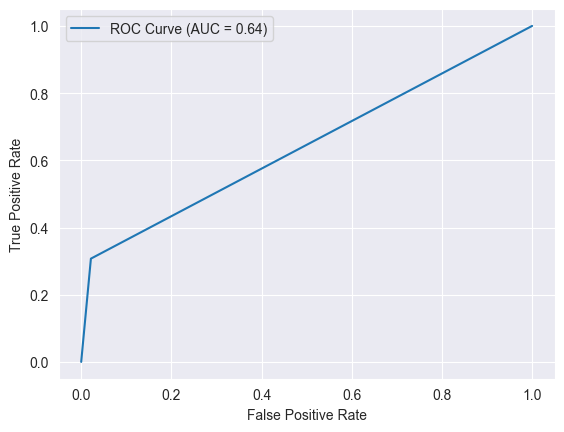

In [8]:
ROC_AUC_plot(y_test, y_pred)

#### Label encoded dataset (ANN Model - 2)

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd 
from sklearn.metrics import classification_report

df = pd.read_csv('dataset2.csv')
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54, stratify=y)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Model definition
ANN = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(16, activation='relu'),      
    Dense(8, activation='relu'),        
    Dense(1, activation='sigmoid')      
])

# Compiling the model
ANN.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  
              metrics=['accuracy'])

# Fitting the model
history = ANN.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Model evaluation
loss, accuracy = ANN.evaluate(X_test, y_test)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")


Epoch 1/50
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8703 - loss: 0.3693 - val_accuracy: 0.8970 - val_loss: 0.2504
Epoch 2/50
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8965 - loss: 0.2486 - val_accuracy: 0.9022 - val_loss: 0.2383
Epoch 3/50
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9008 - loss: 0.2391 - val_accuracy: 0.9010 - val_loss: 0.2352
Epoch 4/50
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9021 - loss: 0.2349 - val_accuracy: 0.9008 - val_loss: 0.2345
Epoch 5/50
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8994 - loss: 0.2391 - val_accuracy: 0.9016 - val_loss: 0.2337
Epoch 6/50
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9022 - loss: 0.2288 - val_accuracy: 0.9012 - val_loss: 0.2333
Epoch 7/50
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9039 - loss: 0.2304 - val_accuracy: 0.9018 - val_loss: 0.2334
Epoch 8/50
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9047 - loss: 0.2303 - 

In [11]:
# Classification report
y_pred = (ANN.predict(X_test) > 0.5).astype("int32")  

print(classification_report(y_test, y_pred))

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7898
           1       0.61      0.45      0.52      1002

    accuracy                           0.91      8900
   macro avg       0.77      0.70      0.73      8900
weighted avg       0.90      0.91      0.90      8900



##### ROC_AUC value

ROC-AUC: 0.70


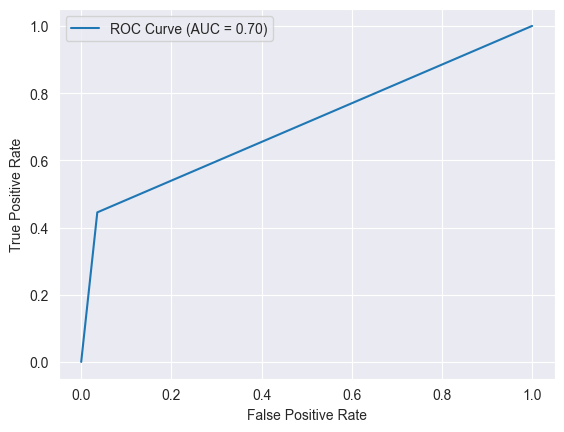

In [12]:
ROC_AUC_plot(y_test, y_pred)

### Using ANN with SMOTE (ANN Model - 3)

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE

df = pd.read_csv('dataset1.csv')
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54, stratify=y)

# Smote for training set
smote = SMOTE(random_state=54)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Model definition
ANN = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(16, activation='relu'),       
    Dense(8, activation='relu'),        
    Dense(1, activation='sigmoid')      
])

# Compiling the model
ANN.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  
              metrics=['accuracy'])

# Fitting the model
history = ANN.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Model evaluation
loss, accuracy = ANN.evaluate(X_test, y_test)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")


Epoch 1/50
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7344 - loss: 0.5191 - val_accuracy: 0.8194 - val_loss: 0.4083
Epoch 2/50
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8436 - loss: 0.3657 - val_accuracy: 0.8072 - val_loss: 0.4003
Epoch 3/50
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8471 - loss: 0.3559 - val_accuracy: 0.7978 - val_loss: 0.4213
Epoch 4/50
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8474 - loss: 0.3570 - val_accuracy: 0.8043 - val_loss: 0.3972
Epoch 5/50
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8507 - loss: 0.3472 - val_accuracy: 0.7816 - val_loss: 0.4326
Epoch 6/50
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8545 - loss: 0.3429 - val_accuracy: 0.8028 - val_loss: 0.3924
Epoch 7/50
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8541 - loss: 0.3403 - val_accuracy: 0.8097 - val_loss: 0.3802
Epoch 8/50
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8535 - loss: 0.3374 - 

In [15]:
from sklearn.metrics import classification_report

y_pred = (ANN.predict(X_test) > 0.5).astype("int32") 

print(classification_report(y_test, y_pred))

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      7898
           1       0.38      0.81      0.52      1002

    accuracy                           0.83      8900
   macro avg       0.68      0.82      0.71      8900
weighted avg       0.91      0.83      0.85      8900



##### ROC_AUC value

ROC-AUC: 0.82


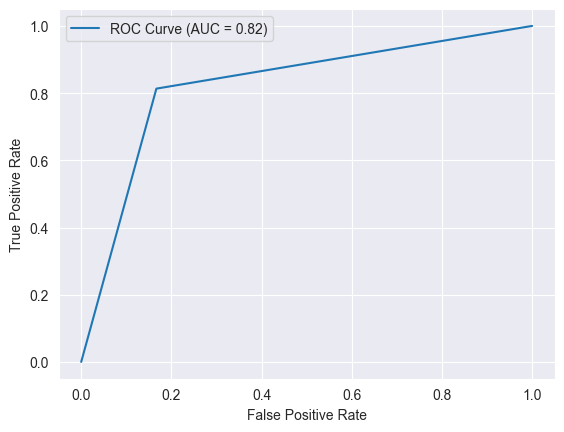

In [16]:
ROC_AUC_plot(y_test, y_pred)

## Optimizing the model

### 1) Model evaluating methods

#### 1. Train vs. test recall

In [5]:
from sklearn.metrics import recall_score

def train_test_recall(ANN, X_train, y_train, X_test, y_test):
    # Predict probabilities for training set
    y_train_pred_prob = ANN.predict(X_train)
    y_train_pred = (y_train_pred_prob > 0.5).astype(int)  
    
    # Predict probabilities for test set
    y_test_pred_prob = ANN.predict(X_test)
    y_test_pred = (y_test_pred_prob > 0.5).astype(int)  
    
    # Evaluate recall on the training set
    train_recall = recall_score(y_train, y_train_pred)
    
    # Evaluate recall on the test set
    test_recall = recall_score(y_test, y_test_pred)
    
    print(f"Training Recall: {train_recall:.4f}")
    print(f"Test Recall: {test_recall:.4f}")


#### 2. SKF cross validation scores

In [6]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import numpy as np

def SKF_CV_accuracy(ANN, X, y, epochs, batch_size):
    smote = SMOTE(random_state=54)
    
    # Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=54)
    
    cv_scores = []

    # Performing cross-validation
    for train_index, test_index in skf.split(X, y):
        # Spliting data into training and test sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Applying SMOTE to the training data
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
        
        X_train_smote = X_train_smote.to_numpy()
        X_test = X_test.to_numpy()
        y_train_smote = y_train_smote.to_numpy()
        y_test = y_test.to_numpy()
        
        # Create a new model instance (to avoid reusing weights)
        model = tf.keras.models.clone_model(ANN)
        model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        
        # Training the model on the resampled training data
        model.fit(X_train_smote, y_train_smote, epochs=epochs, batch_size=batch_size, verbose=0)
        
        # Evaluating on the test set (not resampled)
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        cv_scores.append(accuracy)
    
    # Calculating overall accuracy across all folds
    overall_accuracy = np.mean(cv_scores)
    
    # Result output
    print("Stratified CV Accuracy for each fold:", cv_scores)
    print("Mean Stratified CV Overall Accuracy:", overall_accuracy)
    return overall_accuracy


In [7]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

def CV_class1_recall(ANN, X, y, epochs, batch_size):
    smote = SMOTE(random_state=54)
    
    # Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=54)
    
    recall_scores = []

    # Perform cross-validation
    for train_index, test_index in skf.split(X, y):
        # Splitting the data into training and test sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Applying SMOTE to the training data
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
        
        # Converting data to numpy arrays (TensorFlow requires this format)
        X_train_smote = X_train_smote.to_numpy()
        X_test = X_test.to_numpy()
        y_train_smote = y_train_smote.to_numpy()
        y_test = y_test.to_numpy()
        
        # Create a new model instance (to avoid reusing weights)
        model = tf.keras.models.clone_model(ANN)
        model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        
        # Training the model on the resampled training data
        model.fit(X_train_smote, y_train_smote, epochs=epochs, batch_size=batch_size, verbose=0)
        
        # Predicting on the test set (not resampled)
        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int)
        
        # Calculating recall for class '1'
        class_1_recall = recall_score(y_test, y_pred, pos_label=1)
        recall_scores.append(class_1_recall)
    
    # Calculating overall recall across all folds
    overall_recall = np.mean(recall_scores)
    
    # result output
    print("Class '1' Recall for each fold:", recall_scores)
    print("Mean Class '1' Recall across all folds:", overall_recall)
    return overall_recall


In [8]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

def CV_class0_recall(ANN, X, y, epochs, batch_size):
    smote = SMOTE(random_state=54)
    
    # Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=54)
    
    recall_scores = []

    # Perform cross-validation
    for train_index, test_index in skf.split(X, y):
        # Spliting the data into training and test sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Applying SMOTE to the training data
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
        
        # Converting data to numpy arrays (TensorFlow requires this format)
        X_train_smote = X_train_smote.to_numpy()
        X_test = X_test.to_numpy()
        y_train_smote = y_train_smote.to_numpy()
        y_test = y_test.to_numpy()
        
        # Create a new model instance (to avoid reusing weights)
        model = tf.keras.models.clone_model(ANN)
        model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        
        # Training the model on the resampled training data
        model.fit(X_train_smote, y_train_smote, epochs=epochs, batch_size=batch_size, verbose=0)
        
        # Predicting on the test set (not resampled)
        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int)
        
        # Calculating recall for class '0'
        class_0_recall = recall_score(y_test, y_pred, pos_label=0)
        recall_scores.append(class_0_recall)
    
    # Calculating overall recall across all folds
    overall_recall = np.mean(recall_scores)
    
    # result output
    print("Class '0' Recall for each fold:", recall_scores)
    print("Mean Class '0' Recall across all folds:", overall_recall)
    return overall_recall


In [9]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

def CV_recall(ANN, X, y, epochs, batch_size):
    smote = SMOTE(random_state=54)
    
    # Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=54)
    
    # List to store recall values for each fold
    recall_scores = []

    # Perform cross-validation
    for train_index, test_index in skf.split(X, y):
        # Split the data into training and test sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Apply SMOTE to the training data
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
        
        # Convert data to numpy arrays (TensorFlow requires this format)
        X_train_smote = X_train_smote.to_numpy()
        X_test = X_test.to_numpy()
        y_train_smote = y_train_smote.to_numpy()
        y_test = y_test.to_numpy()
        
        # Create a new model instance (to avoid reusing weights)
        model = tf.keras.models.clone_model(ANN)
        model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        
        # Train the model on the resampled training data
        model.fit(X_train_smote, y_train_smote, epochs=epochs, batch_size=batch_size, verbose=0)
        
        # Predict on the test set (not resampled)
        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int)
        
        # Calculate overall recall (considering both classes)
        overall_recall = recall_score(y_test, y_pred)
        recall_scores.append(overall_recall)
    
    # Calculate mean recall across all folds
    mean_recall = np.mean(recall_scores)
    
    # Output results
    print("Overall Recall for each fold:", recall_scores)
    print("Mean Overall Recall across all folds:", mean_recall)
    return mean_recall


#### 3. Confusion matrix

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test, class_names=None):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    plt.figure(figsize=(3, 3))
    
    # Plot confusion matrix on the current axes
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca())  
    plt.title("Confusion Matrix")
    plt.show()


#### 4. ROC_AUC value

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve

def ROC_AUC_plot(y_test, y_pred):
    # Calculating ROC_AUC
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"ROC-AUC: {roc_auc:.2f}")
    
    import matplotlib.pyplot as plt
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="best")
    plt.show()

#### 5. Learning curve


In [12]:
import matplotlib.pyplot as plt

def learning_curve(history, recall_key, val_recall_key):
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']
    training_accuracy = history.history[recall_key]
    validation_accuracy = history.history[val_recall_key]
    
    plt.figure(figsize=(6, 3))
    plt.plot(training_loss, label='Training Loss')
    plt.plot(validation_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Learning Curve: Loss')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(6, 3))
    plt.plot(training_accuracy, label='Training Recall')
    plt.plot(validation_accuracy, label='Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.title('Learning Curve: Recall')
    plt.legend()
    plt.show()


### 2) Hyperparameter tunning

##### Before hyperparameter tunning

In [52]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE

df = pd.read_csv('dataset1.csv')
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54, stratify=y)

# Smote for training set
smote = SMOTE(random_state=54)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Model definition
ANN = Sequential([
    Input(shape=(X_train.shape[1],)),  # Use Input layer to define the input shape
    Dense(16, activation='relu'),       # No input_shape here, it's already defined in the Input layer
    Dense(8, activation='relu'),        
    Dense(1, activation='sigmoid')      # Output layer for binary classification
])

# Compiling the model
ANN.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  
              metrics=['accuracy'])

# Fitting the model
history = ANN.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Model evaluation
loss, accuracy = ANN.evaluate(X_test, y_test)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")


Epoch 1/50
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7282 - loss: 0.5273 - val_accuracy: 0.8430 - val_loss: 0.3813
Epoch 2/50
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8390 - loss: 0.3749 - val_accuracy: 0.8291 - val_loss: 0.3661
Epoch 3/50
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8438 - loss: 0.3613 - val_accuracy: 0.8279 - val_loss: 0.3569
Epoch 4/50
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8460 - loss: 0.3563 - val_accuracy: 0.8262 - val_loss: 0.3551
Epoch 5/50
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8474 - loss: 0.3526 - val_accuracy: 0.8263 - val_loss: 0.3530
Epoch 6/50
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8496 - loss: 0.3493 - val_accuracy: 0.8244 - val_loss: 0.3546
Epoch 7/50
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8504 - loss: 0.3469 - val_accuracy: 0.8247 - val_loss: 0.3543
Epoch 8/50
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8514 - loss: 0.3447 - 

##### Hyperparameter tunning

In [50]:
import pandas as pd
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score
import tensorflow as tf

df = pd.read_csv('dataset1.csv')
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54, stratify=y)
smote = SMOTE(random_state=54)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# model definition for Keras Tuner
def build_model(hp):
    model = Sequential()
    
    # Tune number of layers and neurons
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
            activation='relu',
            kernel_regularizer=l1(hp.Float(f'l1_reg_{i}', 1e-6, 1e-2, sampling='log')),
        ))
        model.add(Dropout(hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))
    
    model.add(Dense(1, activation='sigmoid'))
    
    # Tune learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-5, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.AUC(name='auc'), 'accuracy', tf.keras.metrics.Recall(name='recall')]
    )
    return model

class F1ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        X_val, y_val = self.validation_data
        y_pred = (self.model.predict(X_val) > 0.5).astype(int)
        val_f1 = f1_score(y_val, y_pred)
        logs['val_f1_score'] = val_f1  # Add F1 score to logs
        print(f"Epoch {epoch + 1} - val_f1_score: {val_f1:.4f}")


# Initialize Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective=kt.Objective('val_f1_score', direction='max'),
    max_trials=20,
    executions_per_trial=1,
    directory='tuner_output',
    project_name='hyperparameter_tuning'
)

# Tuner search with the custom F1ScoreCallback
tuner.search(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=[F1ScoreCallback(validation_data=(X_test, y_test))]
)

best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and train the best model
best_model = tuner.hypermodel.build(best_hp)
history = best_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluating the best model
y_pred = (best_model.predict(X_test) > 0.5).astype(int)
test_f1 = f1_score(y_test, y_pred)
test_metrics = best_model.evaluate(X_test, y_test, verbose=0)

print(f"Test F1 Score: {test_f1}")
print(f"Test Metrics: {dict(zip(best_model.metrics_names, test_metrics))}")
print(f"Optimal Hyperparameters: {best_hp.values}")


Trial 20 Complete [00h 02m 41s]
val_f1_score: 0.4705535924617197

Best val_f1_score So Far: 0.53894297635605
Total elapsed time: 00h 42m 28s
Epoch 1/20
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7586 - auc: 0.8274 - loss: 0.6117 - recall: 0.7673 - val_accuracy: 0.8020 - val_auc: 0.8906 - val_loss: 0.3851 - val_recall: 0.8174
Epoch 2/20
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8413 - auc: 0.9070 - loss: 0.4075 - recall: 0.8925 - val_accuracy: 0.8182 - val_auc: 0.8943 - val_loss: 0.3791 - val_recall: 0.8094
Epoch 3/20
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8446 - auc: 0.9101 - loss: 0.3944 - recall: 0.8985 - val_accuracy: 0.8165 - val_auc: 0.8946 - val_loss: 0.3810 - val_recall: 0.8184
Epoch 4/20
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8484 - auc: 0.9136 - loss: 0.3864 - recall: 0.9005 - val_accuracy: 0.8296 - val_auc: 0.8939 - val_loss: 0.3504 - val_recall: 0.7994
Epoch 5/20
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - ac

##### After hyperparameter tunning (ANN Model - 4)

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.regularizers import l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
from tensorflow.keras.metrics import Recall

df = pd.read_csv('dataset1.csv')
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=54, stratify=y
)

smote = SMOTE(random_state=54)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Optimal hyperparameters
optimal_params = {
    'num_layers': 4,
    'units_0': 96,
    'l1_reg_0': 0.0003508791653882779,
    'dropout_0': 0.5,
    'learning_rate': 0.0008854322452566148,
    'units_1': 48,
    'l1_reg_1': 2.3881377401899324e-05,
    'dropout_1': 0.3,
    'units_2': 48,
    'l1_reg_2': 8.711638700132924e-05,
    'dropout_2': 0.1,
    'units_3': 96,
    'l1_reg_3': 9.614970823920257e-06,
    'dropout_3': 0.1,
    'units_4': 48,
    'l1_reg_4': 0.0008184986648518178,
    'dropout_4': 0.5
}

# Build the model using the optimal hyperparameters
ANN = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(optimal_params['units_0'], activation='relu', kernel_regularizer=l1(optimal_params['l1_reg_0'])),
    Dropout(optimal_params['dropout_0']),
    Dense(optimal_params['units_1'], activation='relu', kernel_regularizer=l1(optimal_params['l1_reg_1'])),
    Dropout(optimal_params['dropout_1']),
    Dense(optimal_params['units_2'], activation='relu', kernel_regularizer=l1(optimal_params['l1_reg_2'])),
    Dropout(optimal_params['dropout_2']),
    Dense(optimal_params['units_3'], activation='relu', kernel_regularizer=l1(optimal_params['l1_reg_3'])),
    Dropout(optimal_params['dropout_3']),
    Dense(optimal_params['units_4'], activation='relu', kernel_regularizer=l1(optimal_params['l1_reg_4'])),
    Dropout(optimal_params['dropout_4']),
    Dense(1, activation='sigmoid')  
])

# Compile the model
ANN.compile(optimizer=Adam(learning_rate=optimal_params['learning_rate']),
            loss='binary_crossentropy',
            metrics=['accuracy', Recall()])

# Train the model
history = ANN.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Evaluate the model
loss, accuracy, recall = ANN.evaluate(X_test, y_test)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}, Validation Recall: {recall}")


Epoch 1/20
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7266 - loss: 0.7418 - recall_1: 0.7134 - val_accuracy: 0.8185 - val_loss: 0.4430 - val_recall_1: 0.8034
Epoch 2/20
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8390 - loss: 0.4602 - recall_1: 0.8808 - val_accuracy: 0.8249 - val_loss: 0.4074 - val_recall_1: 0.7874
Epoch 3/20
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8406 - loss: 0.4367 - recall_1: 0.8843 - val_accuracy: 0.8390 - val_loss: 0.3847 - val_recall_1: 0.7695
Epoch 4/20
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8447 - loss: 0.4274 - recall_1: 0.8879 - val_accuracy: 0.8263 - val_loss: 0.3943 - val_recall_1: 0.7884
Epoch 5/20
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8443 - loss: 0.4225 - recall_1: 0.8852 - val_accuracy: 0.8158 - val_loss: 0.4068 - val_recall_1: 0.8293
Epoch 6/20
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8452 - loss: 0.4202 - recall_1: 0.8918 - val_accuracy: 0.8146 - val_los

In [3]:
from sklearn.metrics import classification_report

y_pred = (ANN.predict(X_test) > 0.5).astype("int32")  

print(classification_report(y_test, y_pred))

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      7898
           1       0.37      0.82      0.51      1002

    accuracy                           0.82      8900
   macro avg       0.67      0.82      0.70      8900
weighted avg       0.90      0.82      0.85      8900



##### Model evaluation

In [13]:
train_test_recall(ANN, X_train, y_train, X_test, y_test)

1975/1975 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training Recall: 0.9014
Test Recall: 0.8224


In [14]:
SKF_CV_accuracy(ANN, X, y, epochs=20, batch_size=32)

Stratified CV Accuracy for each fold: [0.8249438405036926, 0.8620224595069885, 0.8225842714309692, 0.8238004446029663, 0.8224519491195679]
Mean Stratified CV Overall Accuracy: 0.831160593032837


np.float64(0.831160593032837)

In [15]:
CV_class1_recall(ANN, X, y, epochs=20, batch_size=32)

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Class '1' Recall for each fold: [np.float64(0.7944111776447106), np.float64(0.7924151696606786), np.float64(0.8255234297108675), np.float64(0.8403193612774451), np.float64(0.8193612774451098)]
Mean Class '1' Recall across all folds: 0.8144060831477624


np.float64(0.8144060831477624)

In [16]:
CV_class0_recall(ANN, X, y, epochs=20, batch_size=32)

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Class '0' Recall for each fold: [np.float64(0.8223600911623196), np.float64(0.8324892377817169), np.float64(0.7890338103077118), np.float64(0.8258832468025833), np.float64(0.8252500949727745)]
Mean Class '0' Recall across all folds: 0.8190032962054212


np.float64(0.8190032962054212)

In [17]:
CV_recall(ANN, X, y, epochs=20, batch_size=32)

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Overall Recall for each fold: [np.float64(0.8263473053892215), np.float64(0.781437125748503), np.float64(0.8594217347956131), np.float64(0.8403193612774451), np.float64(0.8143712574850299)]
Mean Overall Recall across all folds: 0.8243793569391625


np.float64(0.8243793569391625)

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[6466 1432]
 [ 178  824]]


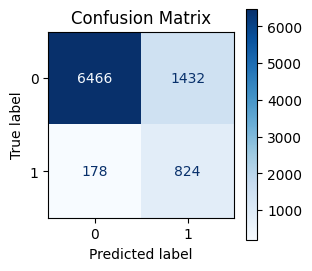

In [18]:
plot_confusion_matrix(ANN, X_test, y_test, class_names=[0,1])

ROC-AUC: 0.82


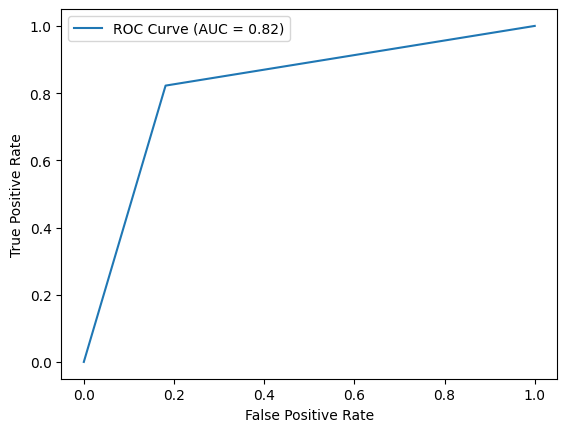

In [21]:
ROC_AUC_plot(y_test, y_pred)

In [19]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'recall_1', 'val_accuracy', 'val_loss', 'val_recall_1'])


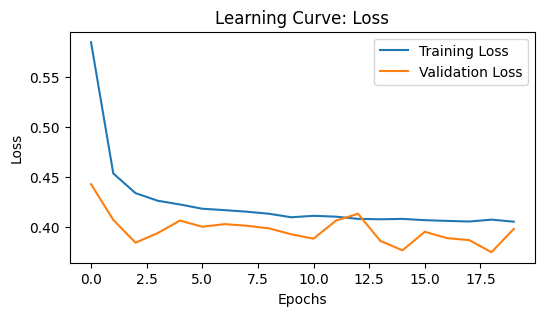

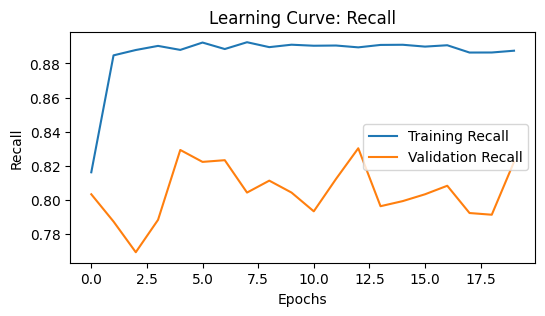

In [20]:
learning_curve(history, 'recall_1', 'val_recall_1')

### Further improvements to mitigate overfitting (ANN Model - 5)

* Removing layers
* Use Learning Rate Schedulers
* Dropout rate increasing
* Batch normalization

In [41]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.regularizers import l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils.class_weight import compute_class_weight
import numpy as np



df = pd.read_csv('dataset1.csv')
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=54, stratify=y
)

smote = SMOTE(random_state=54)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Optimal hyperparameters
optimal_params = {
    'num_layers': 4,
    'units_0': 96,
    'l1_reg_0': 0.0003508791653882779,
    'dropout_0': 0.5,
    'learning_rate': 0.0008854322452566148,
    'units_1': 48,
    'l1_reg_1': 2.3881377401899324e-05,
    'dropout_1': 0.3,
    'units_2': 48,
    'l1_reg_2': 8.711638700132924e-05,
    'dropout_2': 0.1,
    'units_3': 96,
    'l1_reg_3': 9.614970823920257e-06,
    'dropout_3': 0.1,
    'units_4': 48,
    'l1_reg_4': 0.0008184986648518178,
    'dropout_4': 0.5
}

# Build the model using the optimal hyperparameters
ANN = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(optimal_params['units_0'], activation='relu', kernel_regularizer=l1(optimal_params['l1_reg_0']*1.5)),
    BatchNormalization(),
    Dropout(optimal_params['dropout_0']*1.5),
    Dense(optimal_params['units_1'], activation='relu', kernel_regularizer=l1(optimal_params['l1_reg_1']*1.5)),
    BatchNormalization(),
    Dropout(optimal_params['dropout_1']*1.5),
    #Dense(optimal_params['units_2'], activation='relu', kernel_regularizer=l1(optimal_params['l1_reg_2'])),
    #Dropout(optimal_params['dropout_2']),
    Dense(optimal_params['units_3'], activation='relu', kernel_regularizer=l1(optimal_params['l1_reg_3']*1.5)),
    BatchNormalization(),
    Dropout(optimal_params['dropout_3']*1.5),
    Dense(optimal_params['units_4'], activation='relu', kernel_regularizer=l1(optimal_params['l1_reg_4']*1.5)),
    BatchNormalization(),
    Dropout(optimal_params['dropout_4']*1.5),
    Dense(1, activation='sigmoid')  
])

ANN.compile(optimizer=Adam(learning_rate=optimal_params['learning_rate']),
            loss='binary_crossentropy',
            metrics=['accuracy', Recall()])

# Learning rate schedulers
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=3, 
    verbose=1
)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Converting to a dictionary format expected by Keras
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train the model
history = ANN.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
    class_weight=class_weight_dict,
    callbacks=[lr_scheduler])

# Evaluate the model
loss, accuracy, recall = ANN.evaluate(X_test, y_test)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}, Validation Recall: {recall}")


Epoch 1/20
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.5558 - loss: 1.5207 - recall_4: 0.5288 - val_accuracy: 0.8264 - val_loss: 0.6975 - val_recall_4: 0.7605 - learning_rate: 8.8543e-04
Epoch 2/20
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7797 - loss: 0.7000 - recall_4: 0.7922 - val_accuracy: 0.8170 - val_loss: 0.5118 - val_recall_4: 0.8004 - learning_rate: 8.8543e-04
Epoch 3/20
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8139 - loss: 0.5578 - recall_4: 0.8476 - val_accuracy: 0.7992 - val_loss: 0.4827 - val_recall_4: 0.8423 - learning_rate: 8.8543e-04
Epoch 4/20
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8183 - loss: 0.5172 - recall_4: 0.8543 - val_accuracy: 0.8028 - val_loss: 0.4739 - val_recall_4: 0.8313 - learning_rate: 8.8543e-04
Epoch 5/20
1975/1975 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8218 - loss: 0.5016 - recall_4: 0.8607 - val_accuracy: 0.8031 - val_loss: 0.4428 - val_recall_4: 0.8184 - learning_rate: 8.8543e-04

In [42]:
from sklearn.metrics import classification_report

y_pred = (ANN.predict(X_test) > 0.5).astype("int32")  

print(classification_report(y_test, y_pred))

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      7898
           1       0.35      0.82      0.50      1002

    accuracy                           0.81      8900
   macro avg       0.66      0.82      0.69      8900
weighted avg       0.90      0.81      0.84      8900



##### Model Evaluation

In [43]:
train_test_recall(ANN, X_train, y_train, X_test, y_test)

1975/1975 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step
Training Recall: 0.8879
Test Recall: 0.8244


In [44]:
SKF_CV_accuracy(ANN, X, y, epochs=20, batch_size=32)

Stratified CV Accuracy for each fold: [0.7970786690711975, 0.7947190999984741, 0.7987640500068665, 0.8179571032524109, 0.8054837584495544]
Mean Stratified CV Overall Accuracy: 0.8028005361557007


np.float64(0.8028005361557007)

In [26]:
CV_class1_recall(ANN, X, y, epochs=20, batch_size=32)

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Class '1' Recall for each fold: [np.float64(0.811377245508982), np.float64(0.8213572854291418), np.float64(0.839481555333998), np.float64(0.8473053892215568), np.float64(0.8383233532934131)]
Mean Class '1' Recall across all folds: 0.8315689657574182


np.float64(0.8315689657574182)

In [32]:
CV_class0_recall(ANN, X, y, epochs=20, batch_size=32)

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Class '0' Recall for each fold: [np.float64(0.8081792858951633), np.float64(0.8185616611800456), np.float64(0.787387615550209), np.float64(0.8237305305812334), np.float64(0.7511713308851462)]
Mean Class '0' Recall across all folds: 0.7978060848183595


np.float64(0.7978060848183595)

In [33]:
CV_recall(ANN, X, y, epochs=20, batch_size=32)

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Overall Recall for each fold: [np.float64(0.8043912175648703), np.float64(0.810379241516966), np.float64(0.8654037886340977), np.float64(0.8592814371257484), np.float64(0.8493013972055888)]
Mean Overall Recall across all folds: 0.8377514164094542


np.float64(0.8377514164094542)

279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[6393 1505]
 [ 176  826]]


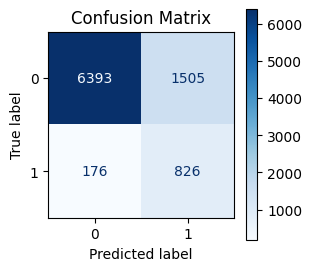

In [47]:
plot_confusion_matrix(ANN, X_test, y_test, class_names=[0,1])

ROC-AUC: 0.82


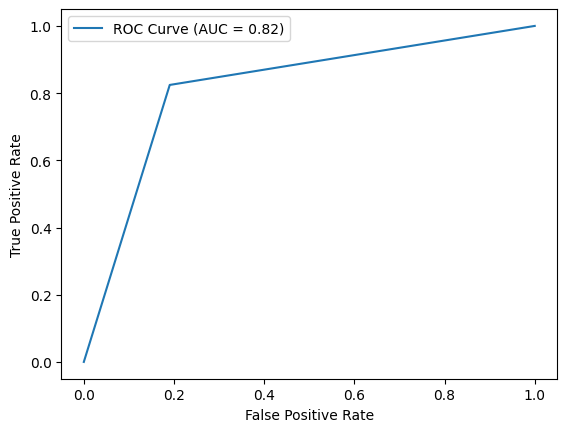

In [45]:
ROC_AUC_plot(y_test, y_pred)

In [48]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'recall_4', 'val_accuracy', 'val_loss', 'val_recall_4', 'learning_rate'])


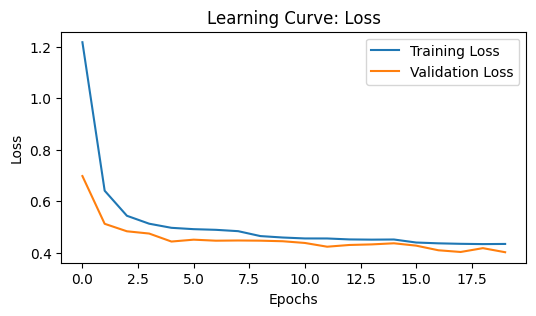

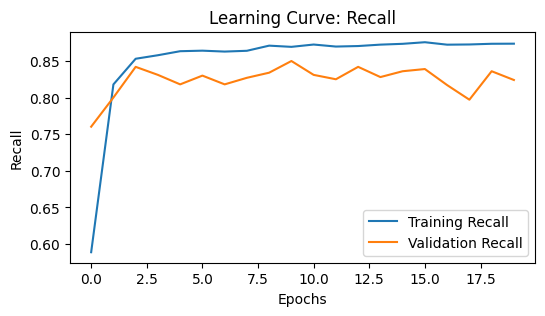

In [49]:
learning_curve(history, 'recall_4', 'val_recall_4')